# Heart Disease Prediction

## Business Problem
The healthcare industry is constantly striving to improve patient care and outcomes. Heart disease is one of the leading causes of death worldwide, and early detection plays a crucial role in preventing heart-related complications. The organization aims to develop a predictive model to assist medical professionals in identifying individuals at risk of heart disease. This predictive model will enable healthcare providers to identify high-risk individuals and intervene with appropriate preventive measures and treatments.

## Project Roadmap
    - Here is the roadmap I have built to complete this project:
        * Import the data
        * Preprocess the data
        * calculate descriptive statistics  
        * Exploratory data analysis
        * Construct the Logistic Regression model
        * Evaluate the Logistic Regression model
        * Construct the Decision Tree model
        * Evaluate the Decision Tree model
        * Project key findings

## About Dataset

    Age : Age of the patient
    
    Sex : Sex of the patient

    exang: exercise induced angina (1 = yes; 0 = no)

    ca: number of major vessels (0-3)

    cp : Chest Pain type chest pain type
    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
    trtbps : resting blood pressure (in mm Hg)

    chol : cholestoral in mg/dl fetched via BMI sensor

    fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

    rest_ecg : resting electrocardiographic results
    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
             elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by 
             Estes' criteria
    
    thalach : maximum heart rate achieved

    target : 0= less chance of heart attack 1= more chance of heart attack
    

I have taken this dataset from Kaggle here is the link to the dataset:



https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting styles
sns.set_style("darkgrid", {'axes.grid' : False}) 
# plt.style.use('dark_background')

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Preprocess Data

### Missing values

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

    - There are not any missing values in this dataset.

## Exploratory Data Analysis

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [10]:
df['output'].value_counts(normalize=True)*100

output
1    54.455446
0    45.544554
Name: proportion, dtype: float64

    - The classes in this dataset are almost balanced.
In this dataset, `54.45%` of the patients have a higher risk of heart disease, while `45.54%` of the patients have a lower risk of heart disease.

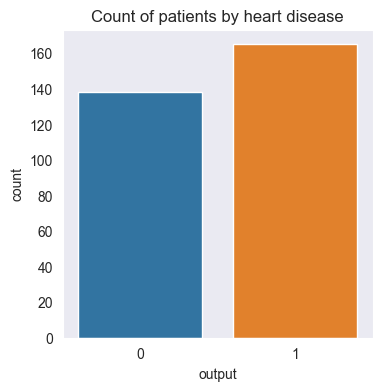

In [11]:
plt.figure(figsize=(4,4))
sns.countplot(x='output', data=df)
plt.title('Count of patients by heart disease')
plt.show()

In [12]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [13]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

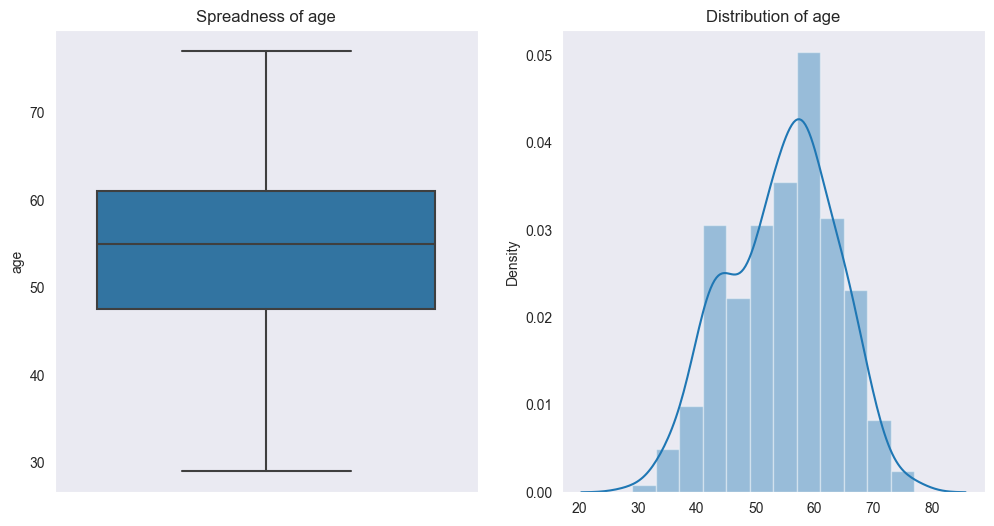

In [14]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['age'])
plt.title('Spreadness of age')

plt.subplot(1,2,2)
sns.distplot(x=df['age'])
plt.title('Distribution of age')
plt.show()

    - Most of the patients in this dataset are aged between 47 and 61.
    - The distribution of ages in this dataset closely resembles a normal distribution.

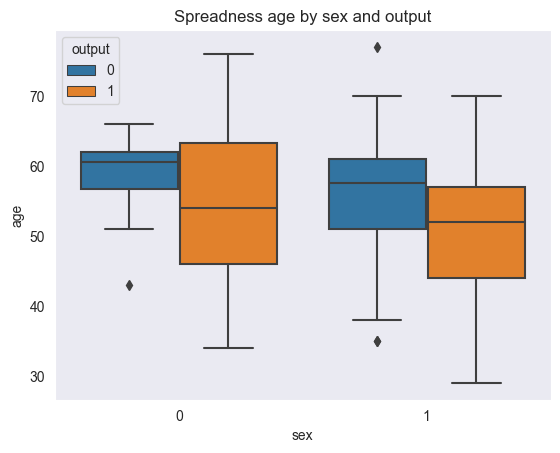

In [15]:
sns.boxplot(x='sex', y='age', data=df, hue='output')
plt.title('Spreadness age by sex and output')
plt.show()

    - The ages of female patients with a higher risk of heart disease are more 
      spread out than those with a lower risk.
    - The ages of male patients with a higher risk of heart disease are slightly 
      more spread out than those with a lower risk.


In [16]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [17]:
df['sex'].value_counts(normalize=True)*100

sex
1    68.316832
0    31.683168
Name: proportion, dtype: float64

    - In this dataset, 68.3% of the patients are male, while only 31.6% are female.

In [18]:
df.groupby(['sex', 'output']).agg({'output':'count'})

output
sex output        
0   0           24
    1           72
1   0          114
    1           93

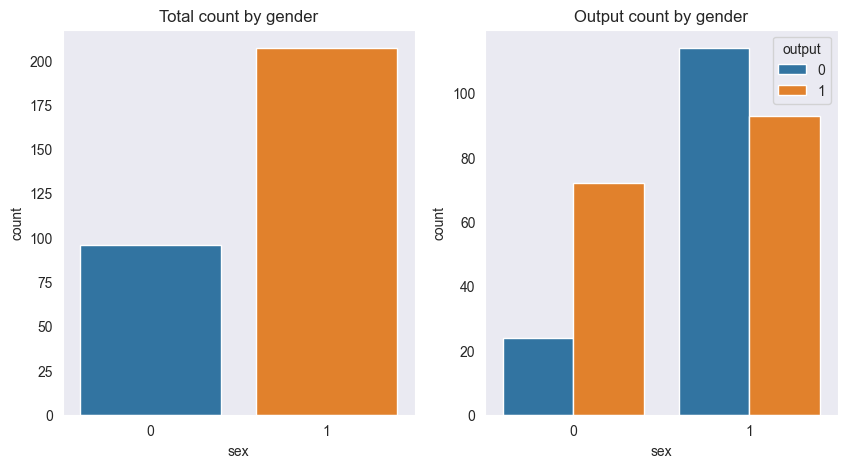

In [19]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='sex',data=df)
plt.title('Total count by gender')

plt.subplot(1,2,2)
sns.countplot(x='sex',data=df, hue='output')
plt.title('Output count by gender')
plt.show()

    - There are nearly twice as many male patients in this dataset as female patients.
    - There are more than twice as many female patients in this dataset who have a 
      higher risk of heart disease.


In [20]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [21]:
df['cp'].value_counts(normalize=True)*100

cp
0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: proportion, dtype: float64

In [22]:
df.groupby(['cp', 'output']).agg({'output':'count'})

output
cp output        
0  0          104
   1           39
1  0            9
   1           41
2  0           18
   1           69
3  0            7
   1           16

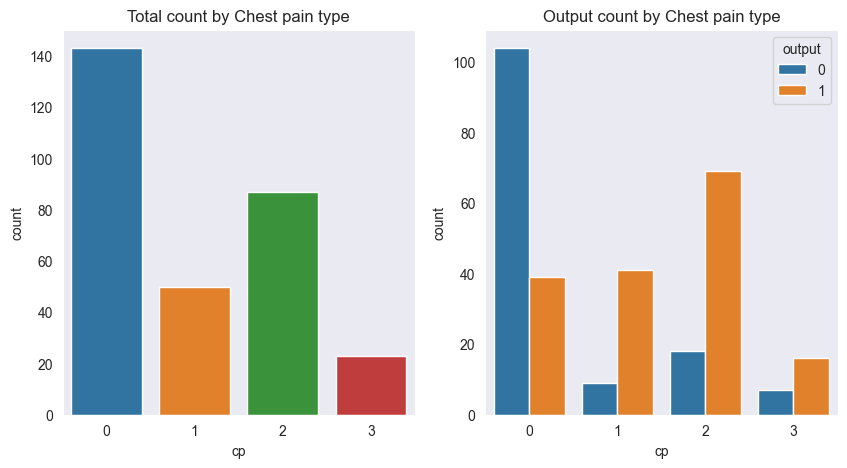

In [23]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='cp',data=df)
plt.title('Total count by Chest pain type')

plt.subplot(1,2,2)
sns.countplot(x='cp',data=df, hue='output')
plt.title('Output count by Chest pain type')
plt.show()

    - 47.19% of the patients have chest pain type 0.
    - Among the approximately 147 patients with chest pain type 0, around 100 
      of them have a lower risk of heart disease.
    - The graph indicates that there are more patients with a lower risk of heart 
      disease when chest pain types are 1, 2, and 3, except for chest pain type 0.


In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [25]:
df['trtbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trtbps, dtype: float64

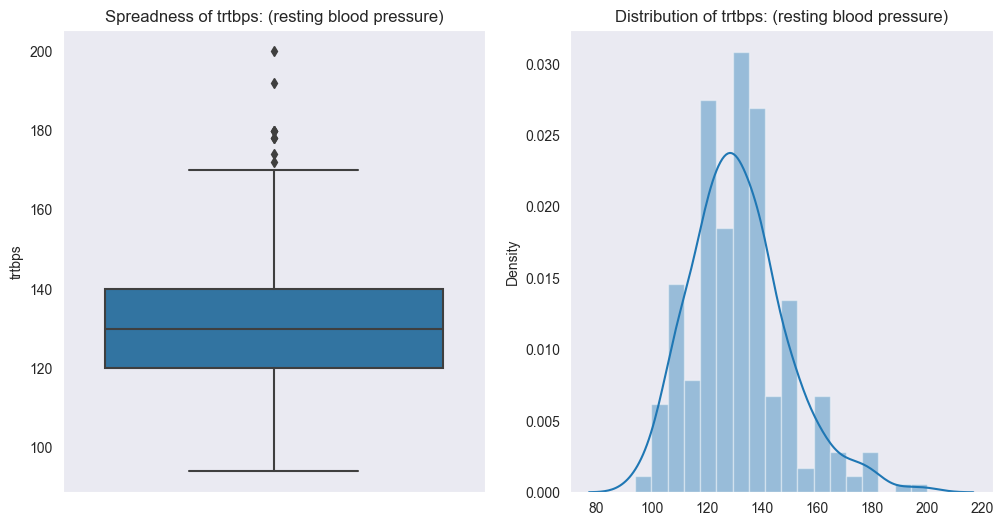

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['trtbps'])
plt.title('Spreadness of trtbps: (resting blood pressure)')

plt.subplot(1,2,2)
sns.distplot(x=df['trtbps'])
plt.title('Distribution of trtbps: (resting blood pressure)')
plt.show()

    - There are outliers present in cases where patients have resting blood 
      pressure greater than 140.
    - The distribution is slightly right-skewed, likely due to the presence 
      of these outliers.


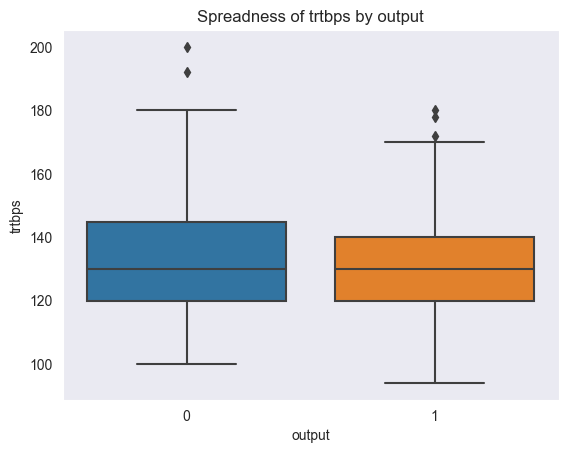

In [27]:
sns.boxplot(x='output', y='trtbps', data=df)
plt.title('Spreadness of trtbps by output')
plt.show()

    - Resting blood pressure is distributed fairly evenly among patients with a higher 
      and lower risk of heart disease.


In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [29]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

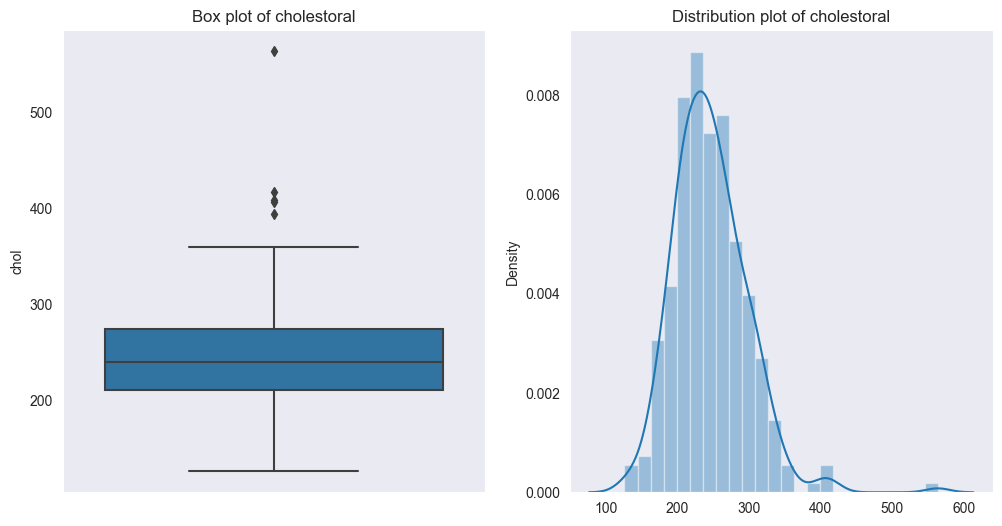

In [30]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['chol'])
plt.title('Box plot of cholestoral')

plt.subplot(1,2,2)
sns.distplot(x=df['chol'])
plt.title('Distribution plot of cholestoral')
plt.show()

    - There is one extreme data point where cholesterol is greater than 500.
    - The distribution is slightly right-skewed due to the presence of a few outliers.

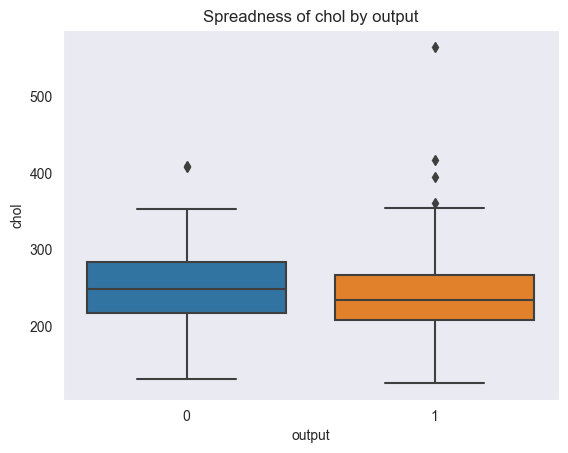

In [31]:
sns.boxplot(x='output', y='chol', data=df)
plt.title('Spreadness of chol by output')
plt.show()

    - Cholesterol levels are distributed fairly evenly among patients with both 
      higher and lower risks of heart disease.


In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [33]:
df['fbs'].value_counts(normalize=True)*100

fbs
0    85.148515
1    14.851485
Name: proportion, dtype: float64

In [34]:
df.groupby(['fbs', 'output']).agg({'output':'count'})

output
fbs output        
0   0          116
    1          142
1   0           22
    1           23

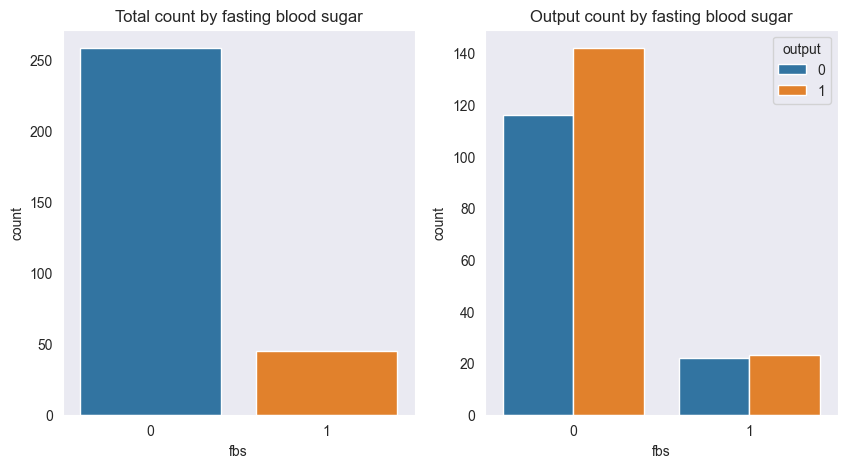

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='fbs',data=df)
plt.title('Total count by fasting blood sugar')

plt.subplot(1,2,2)
sns.countplot(x='fbs',data=df, hue='output')
plt.title('Output count by fasting blood sugar')
plt.show()

    - Approximately 85% of patients in this dataset have fasting blood sugar 
      levels less than 120 mg/dL.
    - The number of patients with fasting blood sugar levels less than 120 mg/dL and a 
      higher risk of heart disease is slightly greater than the number of patients with 
      fasting blood sugar levels less than 120 mg/dL and a lower risk of heart disease.


In [36]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [37]:
df['restecg'].value_counts(normalize=True)*100

restecg
1    50.165017
0    48.514851
2     1.320132
Name: proportion, dtype: float64

In [38]:
df.groupby(['restecg', 'output']).agg({'output':'count'})

output
restecg output        
0       0           79
        1           68
1       0           56
        1           96
2       0            3
        1            1

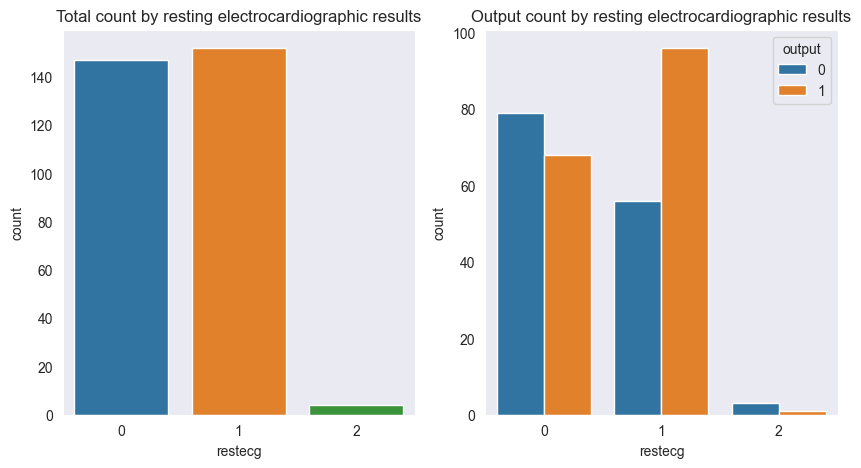

In [39]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='restecg',data=df)
plt.title('Total count by resting electrocardiographic results')

        
plt.subplot(1,2,2)
sns.countplot(x='restecg',data=df, hue='output')
plt.title('Output count by resting electrocardiographic results')
plt.show()

    - Among the patients, 50.16% have `restecg=0`, followed by 48.51% with `restecg=1`, 
      and only 1.32% with `restecg=2`.
    - The count of patients with `restecg=1` who have a higher risk of heart disease is 
       greater than the count of patients with `restecg=1` and a lower risk of heart 
       disease.



In [40]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [41]:
df['thalachh'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalachh, dtype: float64

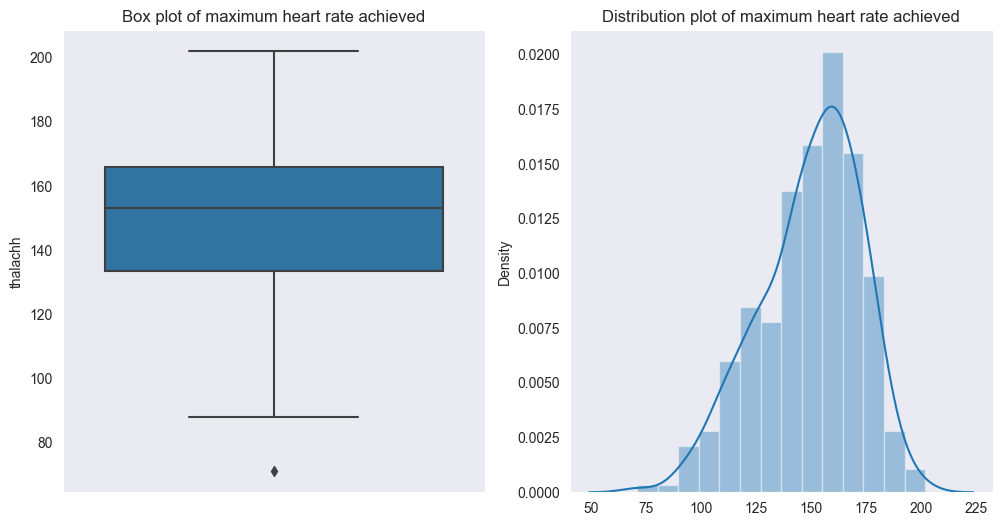

In [42]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['thalachh'])
plt.title('Box plot of maximum heart rate achieved')

plt.subplot(1,2,2)
sns.distplot(x=df['thalachh'])
plt.title('Distribution plot of maximum heart rate achieved')
plt.show()

    - There is one outlier data point where the maximum heart rate achieved is less 
      than 80.
    - The distribution is slightly left-skewed due to the presence of this one outlier.


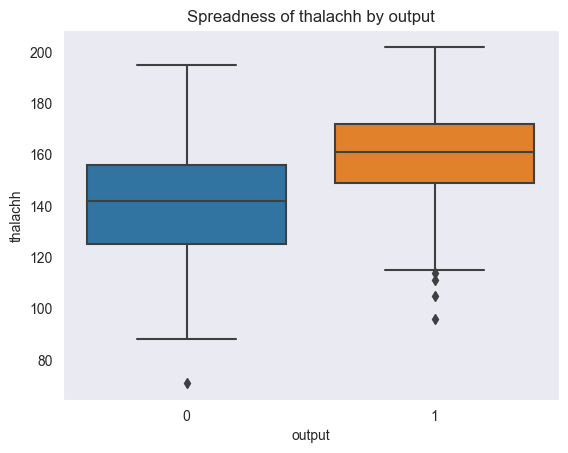

In [43]:
sns.boxplot(x='output', y='thalachh', data=df)
plt.title('Spreadness of thalachh by output')
plt.show()

    - Patients with a higher risk of heart disease have a higher mean value of maximum 
      heart rate achieved than those with a lower risk.


In [44]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [45]:
df['exng'].value_counts(normalize=True)*100

exng
0    67.326733
1    32.673267
Name: proportion, dtype: float64

In [46]:
df.groupby(['exng', 'output']).agg({'output':'count'})

output
exng output        
0    0           62
     1          142
1    0           76
     1           23

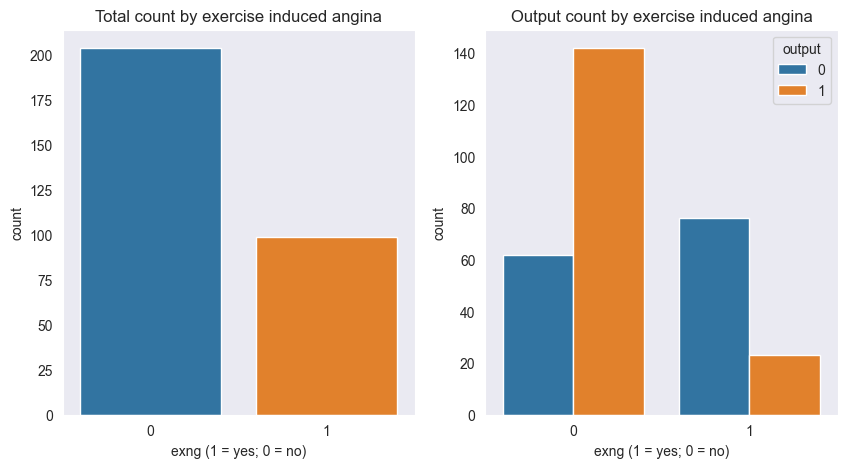

In [47]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='exng',data=df)
plt.title('Total count by exercise induced angina')
plt.xlabel('exng (1 = yes; 0 = no)')

plt.subplot(1,2,2)
sns.countplot(x='exng',data=df, hue='output')
plt.title('Output count by exercise induced angina')
plt.xlabel('exng (1 = yes; 0 = no)')
plt.show()

    - In this dataset, 67.32% of patients have `exng=0`, while only 32.67% have 
      `exng=1`.
    - The count of patients with a higher risk of heart disease is greater when 
      `exng=0`, while the count of patients with a lower risk of heart disease is 
      greater when `exng=1`.

In [48]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [49]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

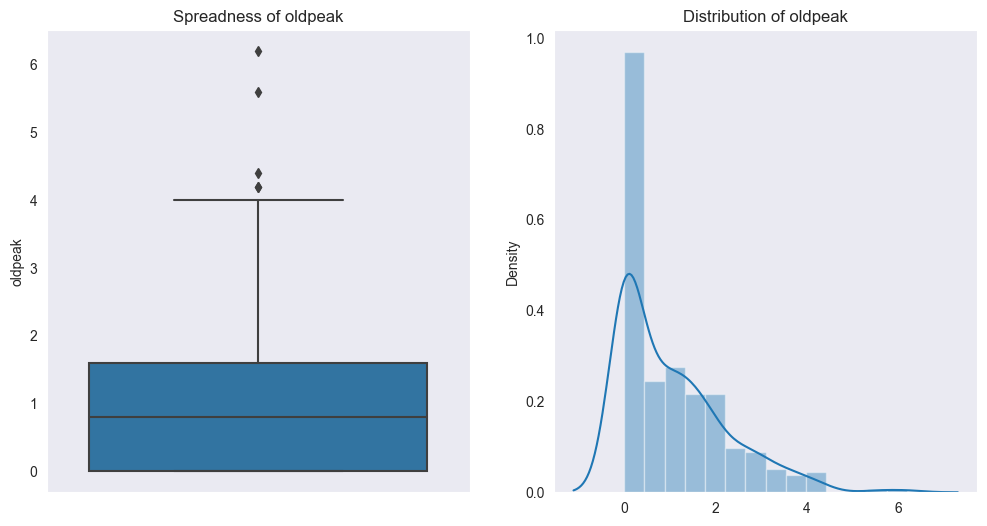

In [50]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(y=df['oldpeak'])
plt.title('Spreadness of oldpeak')

plt.subplot(1,2,2)
sns.distplot(x=df['oldpeak'])
plt.title('Distribution of oldpeak')
plt.show()

    - Most of the data points fall between 1 and 2, with a few exceptions 
      where oldpeak is greater than 4.
    - The distribution is heavily right-skewed.

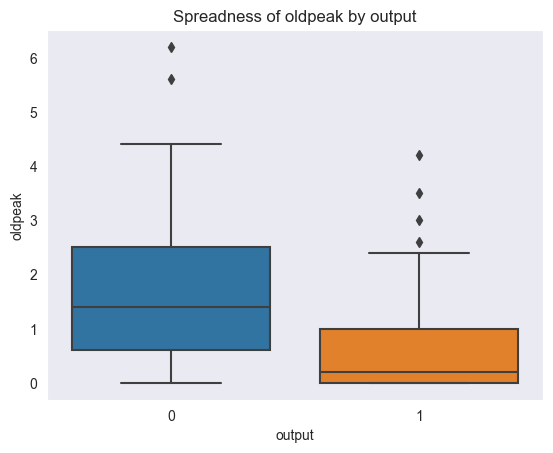

In [51]:
sns.boxplot(x='output', y='oldpeak', data=df)
plt.title('Spreadness of oldpeak by output')
plt.show()

    - Patients with a higher risk of heart disease have a mean oldpeak of around 0.3.
    - Patients with a lower risk of heart disease have a mean oldpeak of around 1.5.

In [52]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [53]:
df['slp'].value_counts(normalize=True)*100

slp
2    46.864686
1    46.204620
0     6.930693
Name: proportion, dtype: float64

In [54]:
df.groupby(['slp', 'output']).agg({'output':'count'})

output
slp output        
0   0           12
    1            9
1   0           91
    1           49
2   0           35
    1          107

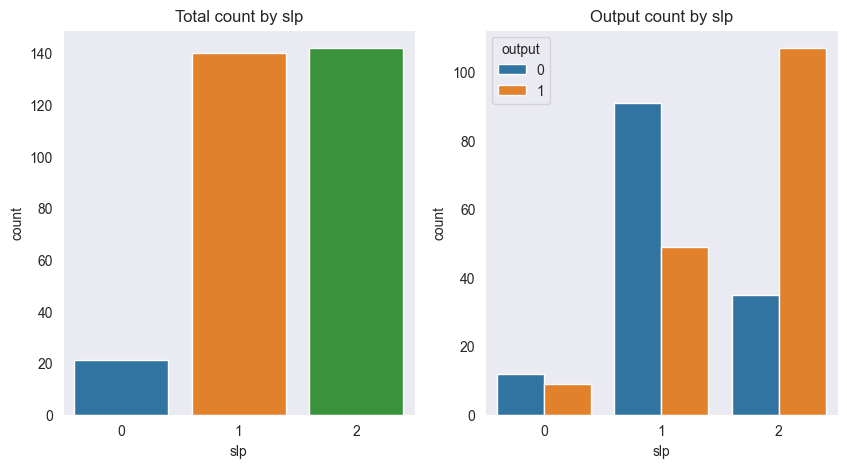

In [55]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='slp',data=df)
plt.title('Total count by slp')

plt.subplot(1,2,2)
sns.countplot(x='slp',data=df, hue='output')
plt.title('Output count by slp')
plt.show()

    - Among the patients, approximately 46.86% have `slp=2`, 46.20% have `slp=1`, 
      and only 6.93% have `slp=0`.
    - Patients with a higher risk of heart disease are more prevalent when `slp=2`, 
      while patients with a lower risk are more prevalent when `slp=1`.



In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [57]:
df['caa'].value_counts(normalize=True)*100

caa
0    57.755776
1    21.452145
2    12.541254
3     6.600660
4     1.650165
Name: proportion, dtype: float64

In [58]:
df.groupby(['caa', 'output']).agg({'output':'count'})

output
caa output        
0   0           45
    1          130
1   0           44
    1           21
2   0           31
    1            7
3   0           17
    1            3
4   0            1
    1            4

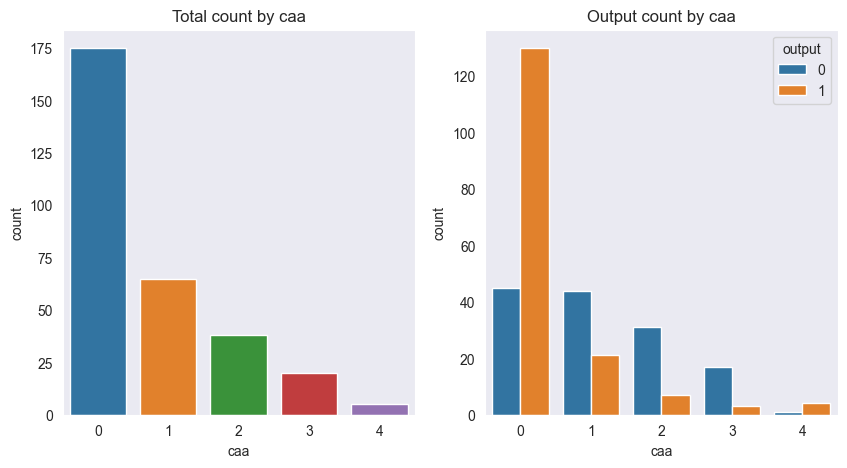

In [59]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='caa',data=df)
plt.title('Total count by caa')

plt.subplot(1,2,2)
sns.countplot(x='caa',data=df, hue='output')
plt.title('Output count by caa')
plt.show()

    - In this dataset, 57.75% of patients have `caa=0`.
    - Among patients with `caa=0`, those with a higher risk of heart disease 
      are more than twice as many as those with a lower risk.
    - For patients with `caa` values of 1, 2, and 3, there are fewer with a 
      higher risk of heart disease compared to those with a lower risk.

In [60]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [61]:
df['thall'].value_counts(normalize=True)*100

thall
2    54.785479
3    38.613861
1     5.940594
0     0.660066
Name: proportion, dtype: float64

In [62]:
df.groupby(['thall', 'output']).agg({'output':'count'})

output
thall output        
0     0            1
      1            1
1     0           12
      1            6
2     0           36
      1          130
3     0           89
      1           28

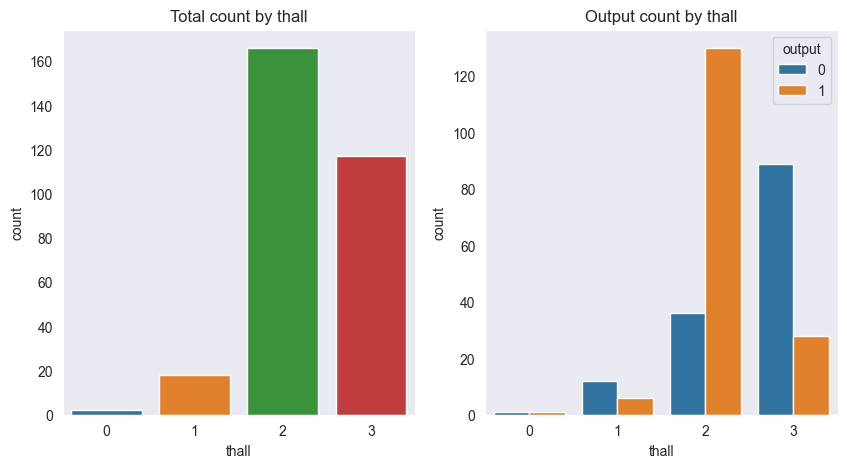

In [63]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1,)
sns.countplot(x='thall',data=df)
plt.title('Total count by thall')

plt.subplot(1,2,2)
sns.countplot(x='thall',data=df, hue='output')
plt.title('Output count by thall')
plt.show()

    - In this dataset, 54.78% of patients have `thall=2`.
    - Among patients with `thall=2`, those with a higher risk of heart disease 
      are more than twice as many as those with a lower risk.
    - For patients with `thall` values of 3 and 1, there are fewer with a higher 
      risk of heart disease compared to those with a lower risk.


## Contruct Logistic Regression model

In [64]:
 # Load in sci-kit learn functions for constructing logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

In [65]:
X = df.drop('output', axis=1)
y = df['output']

X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
# Split dataset into training and holdout datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [68]:
# Print the coefficient
clf.coef_

array([[ 9.42769691e-03, -1.21113541e+00,  7.90337723e-01,
        -1.19438175e-02, -1.34540579e-03, -9.86255777e-05,
         5.38168976e-01,  2.73415376e-02, -8.37795721e-01,
        -6.99383186e-01,  6.30462822e-01, -7.57706160e-01,
        -1.01899352e+00]])

In [69]:
# Print the intercept
clf.intercept_

array([0.02856401])

## Evaluate Logistic Regression model

### Results on training data

In [70]:
# Save predictions
y_pred_train = clf.predict(X_train)

In [71]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  0.8512396694214877
Precision:  0.8299319727891157
Recall:  0.9172932330827067
F1 Score:  0.8714285714285713


In [72]:
# Save predictions
y_pred = clf.predict(X_test)

In [73]:
# Print out the predicted labels
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [74]:
# Print out the predicted probabilities
clf.predict_proba(X_test)[::,-1]

array([1.04377249e-01, 7.51692637e-01, 8.24755911e-01, 2.65568773e-02,
       9.32628647e-01, 9.10308212e-01, 5.98123262e-01, 1.12244733e-03,
       4.76089361e-03, 5.14359963e-01, 7.92619424e-01, 5.87205587e-02,
       9.27672008e-01, 2.00335348e-02, 9.85048279e-01, 9.51155385e-01,
       9.81451658e-01, 5.23879905e-02, 6.31234931e-03, 1.01289260e-02,
       7.00094727e-01, 8.27853637e-03, 1.26692568e-01, 8.27243494e-01,
       9.25952230e-01, 6.83517241e-01, 8.91581695e-01, 6.78224592e-01,
       6.60361731e-03, 9.17936807e-01, 3.86157119e-02, 2.91598808e-02,
       5.57335053e-03, 7.06171077e-02, 6.73683313e-01, 6.74076196e-02,
       6.24541012e-01, 8.86641703e-01, 8.04970537e-01, 8.58082400e-01,
       5.72259240e-01, 8.32277537e-01, 8.07568207e-01, 6.75049740e-01,
       8.46535810e-01, 5.81539197e-03, 8.02347532e-01, 9.56279855e-01,
       7.82734141e-02, 2.70963944e-02, 6.44470958e-02, 1.22693785e-02,
       8.66167631e-01, 9.80292279e-01, 2.37139214e-01, 7.31027667e-04,
      

### Results on the test data

In [75]:
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

Accuracy:  0.8852459016393442
Precision:  0.8787878787878788
Recall:  0.90625
F1 Score:  0.8923076923076922


### Confusion matrix

In [76]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[25,  4],
       [ 3, 29]], dtype=int64)

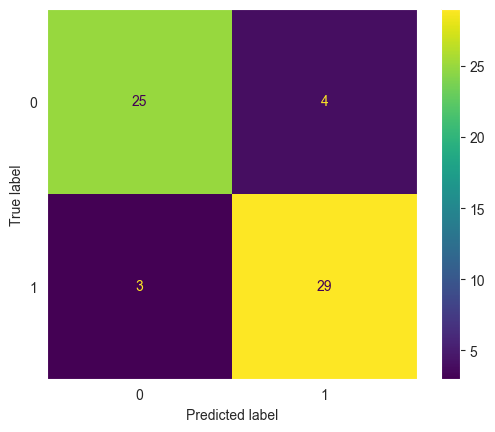

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

## Construct Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
tree = DecisionTreeClassifier(random_state=12)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

##  Evaluate Decision Tree Model

### Performance on test data

In [80]:
tree_y_pred = tree.predict(X_test)
tree_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [81]:
print('Accuracy: ', accuracy_score(y_test, tree_y_pred))
print('Precision: ', precision_score(y_test, tree_y_pred))
print('Recall: ', recall_score(y_test, tree_y_pred))
print('F1 Score: ', f1_score(y_test, tree_y_pred))

Accuracy:  0.8360655737704918
Precision:  0.8928571428571429
Recall:  0.78125
F1 Score:  0.8333333333333334


### Confusion matrix

In [82]:
cm = confusion_matrix(y_test, tree_y_pred, labels=tree.classes_)
cm

array([[26,  3],
       [ 7, 25]], dtype=int64)

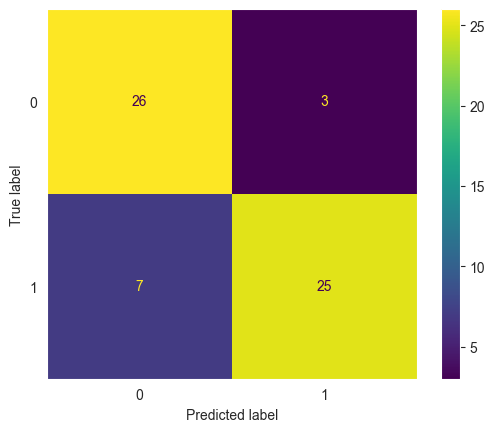

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot();

## Key Findings

The results of the Logistic regression model on test data are:

    Accuracy:  88.52%
    Precision:  87.87%
    Recall:  90.62%
    F1 Score:  89.23%

The results of the Decision tree model on test data are:

    Accuracy:  83.60%
    Precision:  89.28%
    Recall:  78.12%
    F1 Score:  83.33%

**These results clearly show that the Logistic Regression model outperforms the Decision Tree. As a result, we can predict a patient's likelihood of heart disease with an accuracy of 88.52% based on the given features.**